In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import matplotlib.pyplot as plt
%matplotlib inline

dataset

In [2]:
x = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [[3], [7], [11], [15]]

In [3]:
# converte as listas em tensores do pytorch e do tipo float
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

arquitetura

In [5]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 8) # linear
        self.activation = nn.ReLU() # ativação
        self.layer2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        return x

criação do modelo

In [7]:
model = MyNeuralNet()

função de perda

In [8]:
loss_func = nn.MSELoss()

otimizador

In [9]:
opt = SGD(model.parameters(), lr=0.001)

loop de treinamento

In [10]:
losses = []
for i in range(50): # 50 epochs
    opt.zero_grad() # zerar os gradientes antes de cada epoca
    loss_value = loss_func(model(X), Y) # calcula o erro
    loss_value.backward()

    # atualiza os pesos
    opt.step()
    losses.append(loss_value.detach().numpy())

Text(0, 0.5, 'Loss')

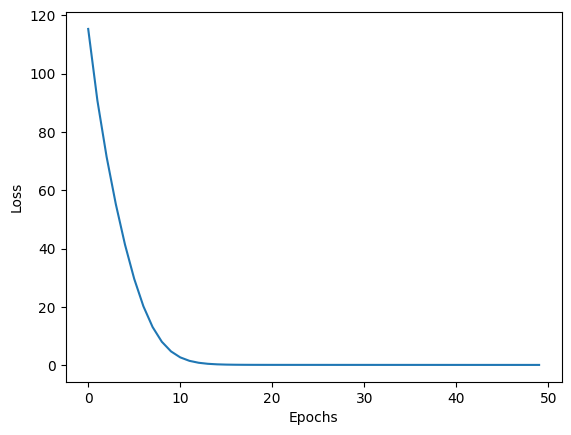

In [11]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')